## Simple example of ML used in flower classification.

### Parts of a flower 

https://en.wikipedia.org/wiki/Flower#/media/File:Mature_flower_diagram.svg

### Scikit-learn

https://scikit-learn.org/stable/

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Logistic Regression

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

### Gradient Descent in TensorFlow

https://github.com/nalinda05kl/ML_Demos_TSU/blob/master/Batch_Gradient_Descent_Intro.ipynb

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# shape
print(dataset.shape)
print(type(dataset))

(150, 5)
<class 'pandas.core.frame.DataFrame'>


In [9]:
array_test = dataset.values
print(type(array_test))

<type 'numpy.ndarray'>


In [13]:
print(array_test)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [15]:
print(array_test[4])

[5.0 3.6 1.4 0.2 'Iris-setosa']


In [16]:
print(array_test[0:4])

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']]


In [17]:
print(array_test[3])

[4.6 3.1 1.5 0.2 'Iris-setosa']


In [18]:
print(array_test[3,3])

0.2


In [19]:
print(array_test[3,0:4])

[4.6 3.1 1.5 0.2]


In [21]:
print(array_test[:,0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
print(array_test[:,4])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [10]:
print(array_test[2:4,0])

[4.7 4.6]


In [5]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Box Plots:

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

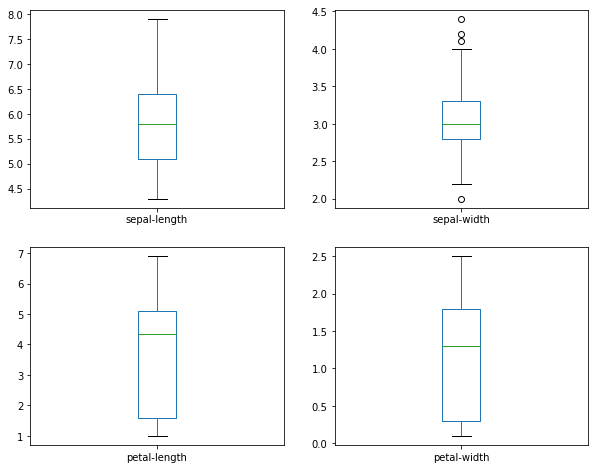

In [7]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize = (10,8))
plt.show()

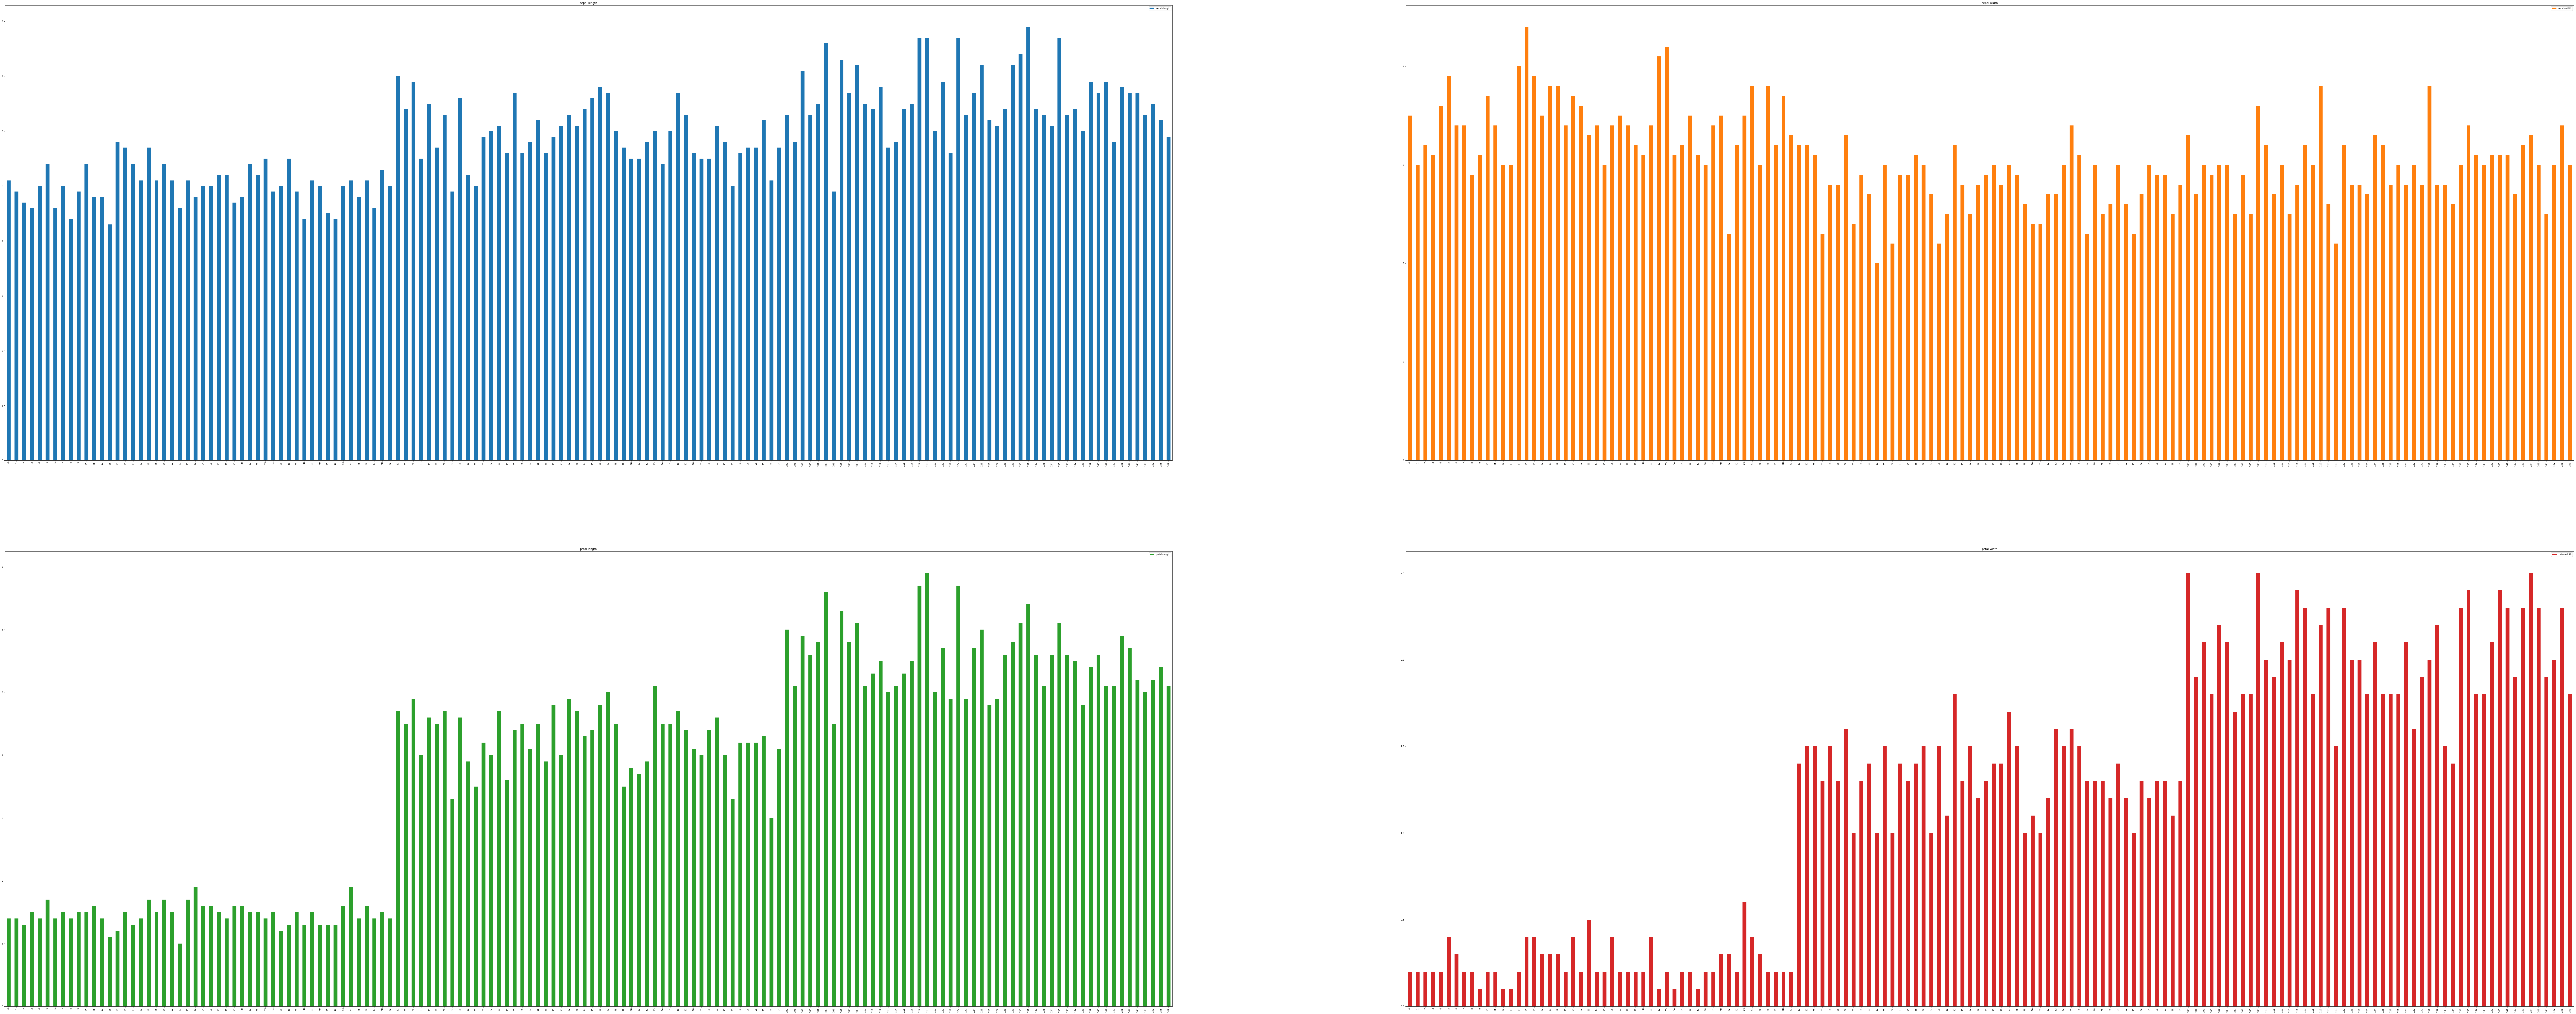

In [8]:
dataset.plot(kind='bar', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize = (200,80))
plt.show()

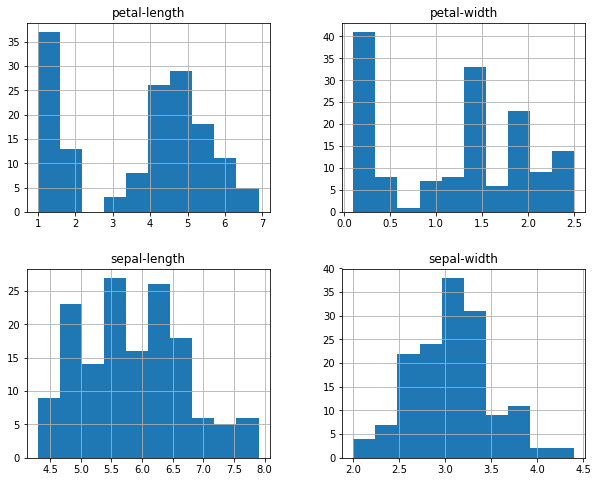

In [9]:
# histograms
dataset.hist(figsize = (10,8))
plt.show()

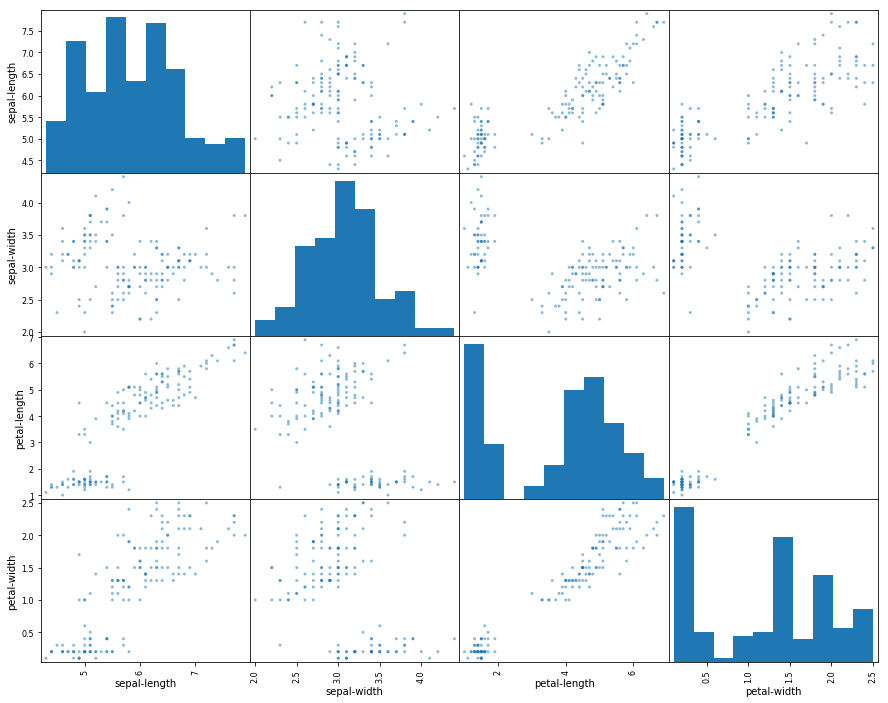

In [10]:
# scatter plot matrix
scatter_matrix(dataset, figsize = (15,12))
plt.show()

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [12]:
print (X_train.shape)
print (Y_train.shape)
print (X_validation.shape)
print (Y_validation.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [13]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

### sklearn, Logistic regression model details:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Cross Validation for model selection

https://machinelearningmastery.com/k-fold-cross-validation/

In [14]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

In [15]:
print cv_results.mean()

0.9666666666666666


In [16]:
model_selected = LogisticRegression(solver='liblinear', multi_class='ovr')
model_selected.fit(X_train, Y_train)
predictions = model_selected.predict(X_validation)

In [17]:
print type(predictions)

<type 'numpy.ndarray'>


In [18]:
pred_list = predictions.tolist()
true_list = Y_validation.tolist()

In [19]:
print len(pred_list)

30


In [20]:
for a,b in list(zip(pred_list,true_list)):
    print (a,b)

('Iris-virginica', 'Iris-virginica')
('Iris-virginica', 'Iris-versicolor')
('Iris-setosa', 'Iris-setosa')
('Iris-virginica', 'Iris-versicolor')
('Iris-virginica', 'Iris-virginica')
('Iris-setosa', 'Iris-setosa')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris-versicolor')
('Iris-setosa', 'Iris-setosa')
('Iris-versicolor', 'Iris-versicolor')
('Iris-virginica', 'Iris-versicolor')
('Iris-virginica', 'Iris-versicolor')
('Iris-setosa', 'Iris-setosa')
('Iris-virginica', 'Iris-virginica')
('Iris-setosa', 'Iris-setosa')
('Iris-virginica', 'Iris-versicolor')
('Iris-virginica', 'Iris-virginica')
('Iris-virginica', 'Iris-virginica')
('Iris-setosa', 'Iris-setosa')
('Iris-setosa', 'Iris-setosa')
('Iris-versicolor', 'Iris-versicolor')
('Iris-virginica', 'Iris-virginica')
('Iris-versicolor', 'Iris-versicolor')
('Iris-virginica', 'Iris-virginica')
('Iris-versicolor', 'Iris-virginica')
('Iris-virginica', 'Iris-virginica')
('Iris-versicolor', 'Iris-versicolor')
('Iris-versicolor', 'Iris

In [21]:
print(accuracy_score(Y_validation, predictions))

0.8
